In [20]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

### Clean the data

In [21]:
# Read the NYC weather data
df = pd.read_csv('nyc_weather.csv')

# Keep only the specified columns
columns_to_keep = ['STATION', 'NAME', 'DATE', 'TMAX', 'TMIN']
df = df[columns_to_keep].copy()

# Convert DATE to datetime - ensure proper conversion
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d', errors='coerce')

# Drop any rows where DATE conversion failed
df = df.dropna(subset=['DATE'])

# Sort by date
df = df.sort_values('DATE')

# Create features for time
df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month
df['day'] = df['DATE'].dt.day
df['day_of_week'] = df['DATE'].dt.dayofweek

clean_df.head()

,STATION,NAME,DATE,TMAX,TMIN,year,month,day,day_of_week
0,USW00094728,"NY CITY CENTRAL PARK, NY US",1869-12-01,62,33,1869,12,1,2
1,USW00094728,"NY CITY CENTRAL PARK, NY US",1869-12-02,33,24,1869,12,2,3
2,USW00094728,"NY CITY CENTRAL PARK, NY US",1869-12-03,29,16,1869,12,3,4
3,USW00094728,"NY CITY CENTRAL PARK, NY US",1869-12-04,37,15,1869,12,4,5
4,USW00094728,"NY CITY CENTRAL PARK, NY US",1869-12-05,39,35,1869,12,5,6


### Normalize Data

In [22]:
# Select features for the model
feature_columns = ['TMAX', 'TMIN', 'year', 'month', 'day', 'day_of_week']

# Normalize the features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[feature_columns])
scaled_df = pd.DataFrame(scaled_data, columns=feature_columns)

scaled_df.head()

,TMAX,TMIN,year,month,day,day_of_week
0,0.576923,0.470588,0.0,1.0,0.000000,0.333333
1,0.298077,0.382353,0.0,1.0,0.033333,0.500000
2,0.259615,0.303922,0.0,1.0,0.066667,0.666667
3,0.336538,0.294118,0.0,1.0,0.100000,0.833333
4,0.355769,0.490196,0.0,1.0,0.133333,1.000000


### Visualize Data

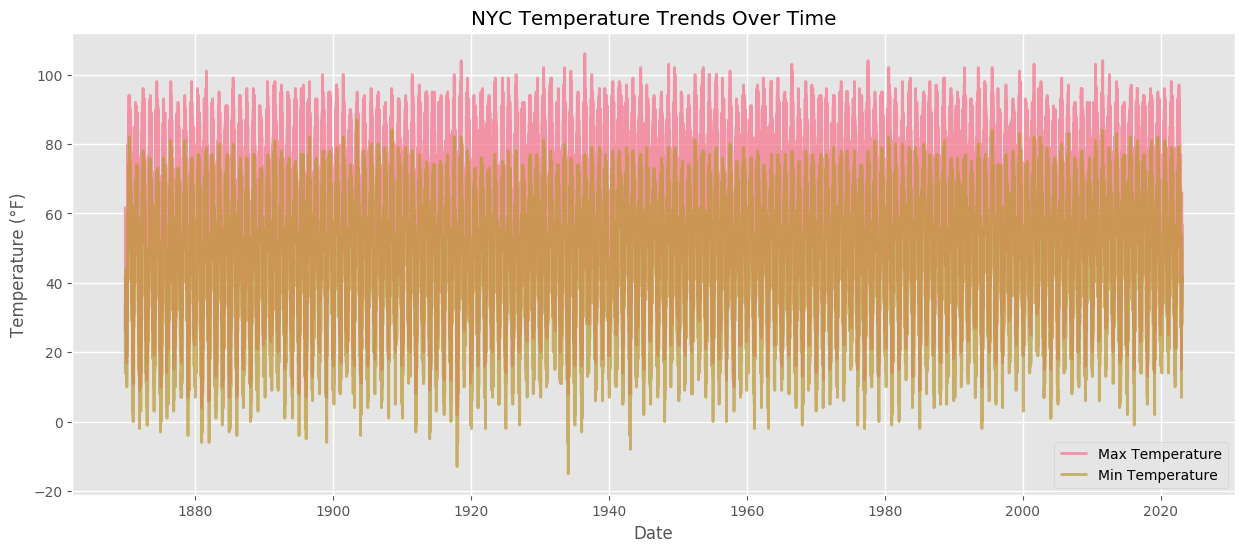

<Figure size 1200x600 with 0 Axes>

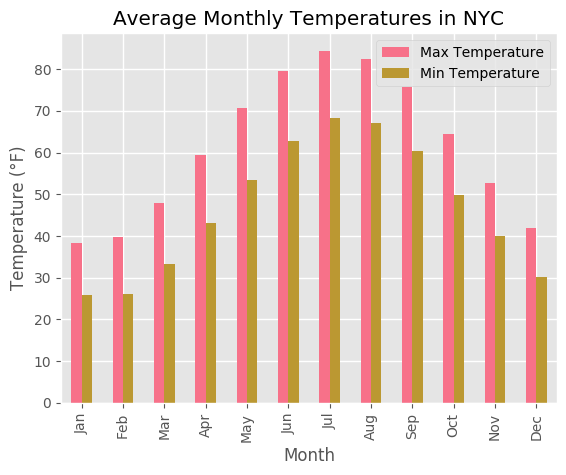

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
# Set the style for better visualizations
plt.style.use('ggplot')  # Using ggplot style instead of seaborn
sns.set_palette("husl")

# Plot temperature trends over time
plt.figure(figsize=(15, 6))
plt.plot(df['DATE'], df['TMAX'], label='Max Temperature', alpha=0.7)
plt.plot(df['DATE'], df['TMIN'], label='Min Temperature', alpha=0.7)
plt.title('NYC Temperature Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.grid(True)
plt.show()

# Plot monthly average temperatures
monthly_avg = df.groupby('month')[['TMAX', 'TMIN']].mean()
plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='bar')
plt.title('Average Monthly Temperatures in NYC')
plt.xlabel('Month')
plt.ylabel('Temperature (°F)')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(['Max Temperature', 'Min Temperature'])
plt.grid(True)
plt.show()